Método de Elementos finitos:

Buscamos resolver el problema $$-u'' = f, u(0) = A, u(1) = B$$

Considere
$$ a_{ij} = \int_0^1 \phi_i' \phi_j' dx $$
Además, sea
$$ b_j = \int_0^1 f \phi_j dx $$

buscamos retornar el valor $\alpha$ donde: $A \alpha = B$, para poder hallar $u = \sum \alpha_i \phi_i$.

In [ ]:
import numpy as np
from scipy.special import roots_legendre
from functools import partial
import matplotlib.pyplot as plt

def gauss1d(fun, x0, x1):
    n = 5
    xi, wi = roots_legendre(n)
    inte = 0
    h = 0.5 * (x1 - x0)
    xm = 0.5 * (x0 + x1)
    for cont in range(n):
        inte += h * fun(h * xi[cont] + xm) * wi[cont]
    return inte

#definiendo la partición: en este caso es determinada manualmente
n = 5
pp = np.array([i/n for i in range(n+1)])
# pp = np.array([0,0.001,0.8,0.9,0.99,1])
h = np.array([pp[i]-pp[i-1] for i in range(1,n+1)])
# print(h-np.diff(pp))
pseudophi1 = lambda x,i: (x-pp[i-1])/(pp[i]-pp[i-1])
pseudophi2 = lambda x,i: (x-pp[i+1])/(pp[i]-pp[i+1])

def phi0(x):
  if x <= pp[1]:
    return pseudophi2(x,0)
  else:
    return 0

def phin(x):
  if x >= pp[n-1]:
    return pseudophi1(x,n)
  else:
    return 0


#definiendo los phi_i(x):
def phi(x,i):
  if np.logical_and( x >= pp[i-1], x < pp[i]):
    return pseudophi1(x,i)
  if np.logical_and(x >= pp[i] , x < pp[i+1]):
    return pseudophi2(x,i)
  else:
    return 0

def integral_of_phi_times_f_i(f,j):
  aux1 = partial(pseudophi1, i = j)
  aux2 = partial(pseudophi2, i = j)
  f1 = lambda x: f(x)*aux1(x)
  f2 = lambda x: f(x)*aux2(x)
  return gauss1d(f1,pp[j-1],pp[j]) + gauss1d(f2,pp[j],pp[j+1])

def integral_of_phi_times_f_0(f):
  aux1 = lambda x: f(x)*phi(x,0)
  return gauss1d(aux1,pp[0],pp[1])

def integral_of_phi_times_f_n(f):
  aux1 = lambda x: f(x)*phi(x,n)
  return gauss1d(aux1,pp[n-1],pp[n])

def TDMA(a,b,c,d):
    n = len(d)
    w= np.zeros(n-1,float)
    g= np.zeros(n, float)
    p = np.zeros(n,float)

    w[0] = c[0]/b[0]
    g[0] = d[0]/b[0]

    for i in range(1,n-1):
        w[i] = c[i]/(b[i] - a[i-1]*w[i-1])
    for i in range(1,n):
        g[i] = (d[i] - a[i-1]*g[i-1])/(b[i] - a[i-1]*w[i-1])
    p[n-1] = g[n-1]
    for i in range(n-1,0,-1):
        p[i-1] = g[i-1] - w[i-1]*p[i]
    return p

[0. 0. 0. 0. 0.]


Consideremos el problema
\begin{align*}
-u''(x) = - 6x\\
u(0) = A = 0 \\
u(1) = B = 1
\end{align*}
Con solución exacta $u(x) = x^3$.

[0.         0.0396016  0.0776244  0.11255257 4.35034854 0.84147098]


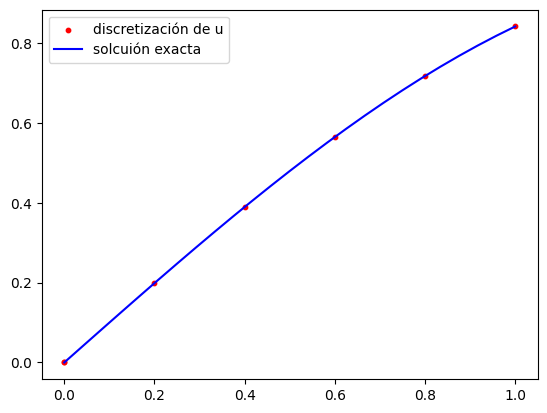

In [ ]:
#ensamblando el sistema lineal:
#usaremos algoritmo de Thomas.

f = lambda x: np.sin(x)
A = 0
B = np.sin(1)

main_diagonal = np.zeros(n+1,float)
upper_lower = np.zeros(n,float)
main_diagonal[0] = 1
main_diagonal[n] = 1


for i in range(1,n):
  main_diagonal[i] = 1/h[i-1]+1/h[i]

upper_lower[0] = 0
upper_lower[n-1] = 0

for i in range(1,n-1):
  upper_lower[i] = -1/h[i]

bfor = np.zeros(n+1,float)
bfor[0] = A
bfor[n] = B

for j in range(1,n):
  bfor[j] = integral_of_phi_times_f_i(f,j)


bfor[1] += A/h[0]
bfor[n-1] += B/h[n-1]
print(bfor)

alfa = TDMA(upper_lower, main_diagonal, upper_lower, bfor)

def uh(x):
  z = alfa[0]*phi0(x) + alfa[n]*phin(x)
  for i in range(1,n):
    z += alfa[i]*phi(x,i)
  return z

xx = np.linspace(0,1,25)
plt.scatter(0,uh(0),c = 'red',s = 10,label='discretización de u')
for x in pp:
  plt.scatter(x,uh(x),c = 'red',s = 10)
plt.plot(xx, np.sin(xx),label='solcuión exacta', c= 'blue')
plt.legend()